In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interpolate

### Кривая намагничивания

In [26]:
data = pd.read_csv("data.csv")
data

,voltage[V],current[A],amp[muV]
0,1,0.00,6.5
1,1,0.25,34.6
2,1,0.48,52.5
3,1,0.66,71.4
4,1,0.85,83.4
5,1,1.00,97.2
6,1,1.12,109.1
7,1,1.26,120.8
8,1,1.41,132.2
9,1,1.60,142.8


In [27]:
x_dots =  data['current[A]']
y_dots = data['amp[muV]']          
order = np.argsort(x_dots)
x_dots, y_dots = x_dots[order], y_dots[order]
interpolation = interpolate.UnivariateSpline(x_dots,
                                             y_dots,
                                              s = 10)
x_line = np.linspace(-3, 3, 1000)
y_interp = interpolation(x_line)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


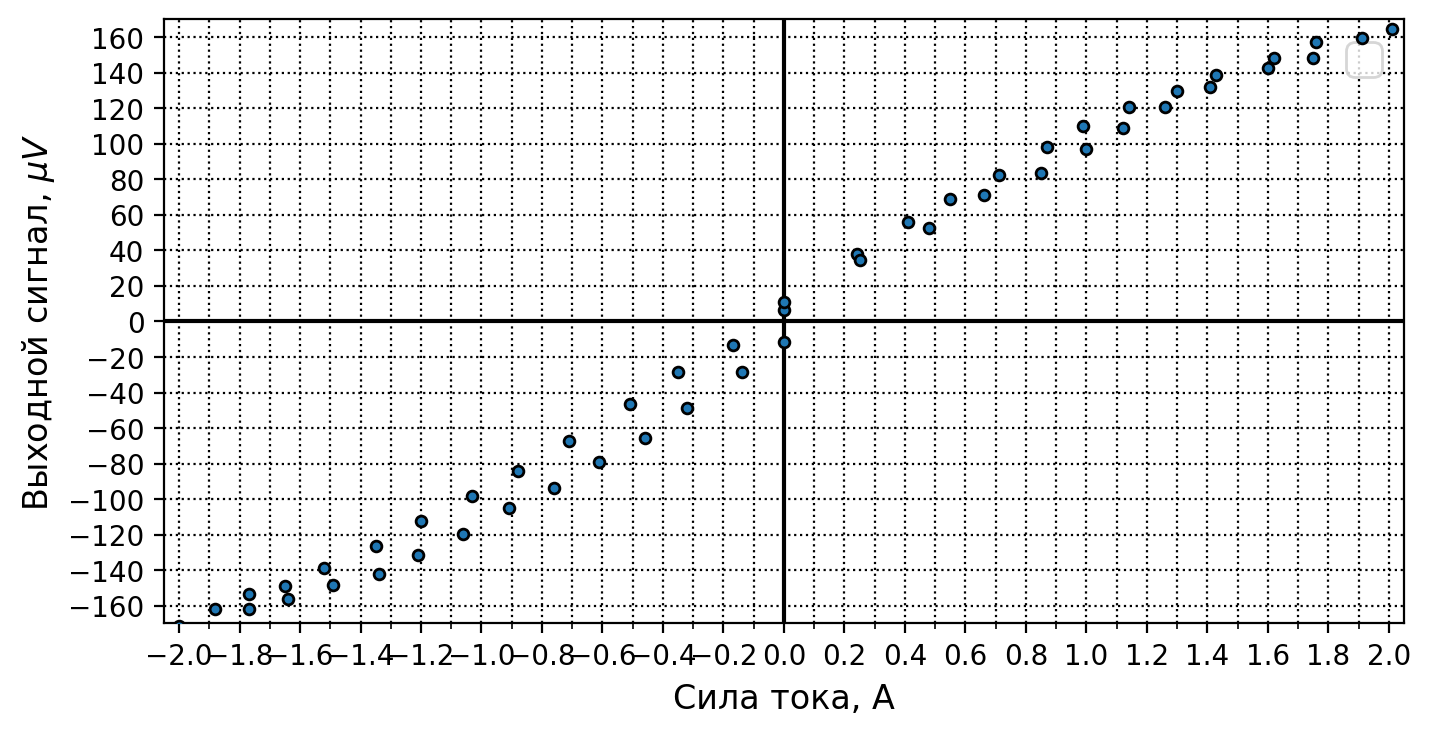

In [32]:
plt.figure(figsize = (8, 4), dpi = 200)
plt.axvline(0, color = 'black')
plt.axhline(0, color = 'black')
plt.scatter(x_dots, y_dots, edgecolors='black', s = 15, zorder = 10)
plt.xlabel("Сила тока, А", fontsize = 12)
plt.ylabel(r"Выходной сигнал, $\mu V$", fontsize = 12)

plt.xticks(np.arange(-2, 2.1, 0.1), minor = True)
plt.xticks(np.arange(-2, 2.2, 0.2))
plt.yticks(np.arange(-160, 200, 20))
plt.ylim(-170, 170)
plt.xlim(-2.05, 2.05)
plt.grid(which = 'both', color = 'black', ls = ':')
plt.legend(fontsize = 16)

### Амплитуда от частоты

(0.0, 90.0)

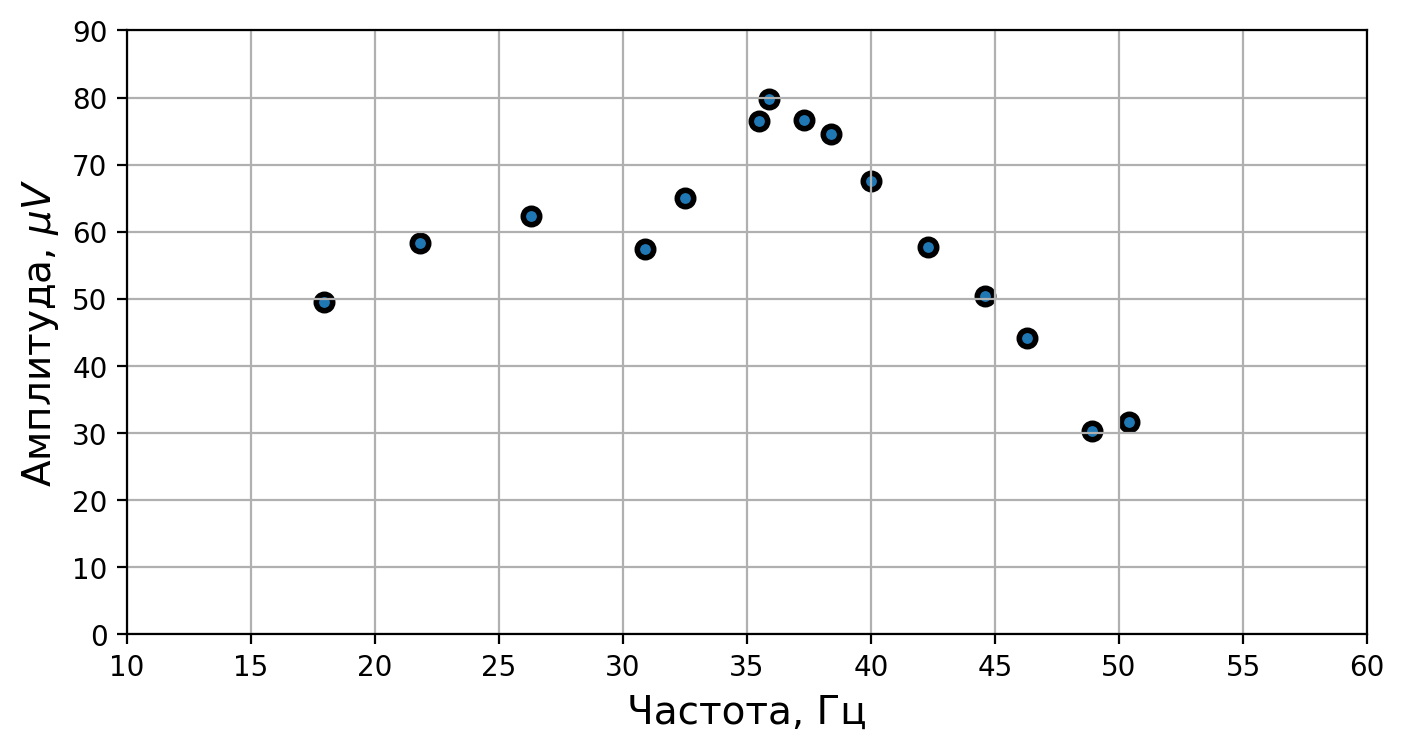

In [25]:
data = pd.read_csv("amp_by_freq.csv")


plt.figure(figsize = (8, 4), dpi = 200)
plt.scatter(data['freq[Hz]'], np.abs(data['amp[muV]']), s = 35, edgecolors='black', linewidths=2)
plt.xlabel(r"Частота, Гц", fontsize = 14)
plt.ylabel(r"Амплитуда, $\mu V$", fontsize = 14)
plt.xticks(np.arange(10, 100, 5))
plt.grid()
plt.xlim(10, 60)
plt.ylim(0, 90)
# plt.title("Подбор оптимальной частоты", fontsize = 16)